# StackExchange
For this Project we will Explore very Popular  Website Called **StackExchange**.<br>
to go to the website click here [link](https://datascience.stackexchange.com/)

StackExchange: is a network of question-and-answer (Q&A) websites on topics in diverse fields.

### After Exploring the Web We Came Up With These Questions:

**1- What kind of questions are welcome on this site?**

**2- does the site's home subdivide into?**

**3- What, other than questions, Does any of them look useful towards our goal?**

### Answers
**1** - The answer is you can ask any qusetion about 
- Technology
- Life / Arts
- Culture / Recreation
- Science
- Other

**2**-  second Question **does the site's home subdivide into?**
                       
                       Yes



**3** - **Does any of them look useful towards our goal?**
- After a spending some time investigating the website, you decide that the tags will be very useful in categorizing content, saving you the trouble of you having to do it yourself.

### Now comes the challenge of accessing the data
**Stack Exchange provides a public data base for each of its websites. Here's a link to query and explore Data Science Stack Exchange's database.**

(https://data.stackexchange.com/stackoverflow/query/new)

### Task:
- Investigate a few of the tables, especially those whose names sound more promising;
- Write a few queries to get a feel for the data;

After Investigation 
The posts table has a lot of columns. We'll be focusing our attention on those that seem relevant towards our goal:

- Id: An identification number for the post.
- PostTypeId: An identification number for the type of post.
- CreationDate: The date and time of creation of the post.
- Score: The post's score.
- ViewCount: How many times the post was viewed.
- Tags: What tags were used.
- AnswerCount: How many answers the question got (only applicable to question posts).
- FavoriteCount: How many times the question was favored (only applicable to question posts).

Due to their low volume, anything that isn't questions or answers is mostly inconsequential. Even if it happens to be the case that such kind of posts is immensely popular, they would just be outliers and not relevant to us. We'll then just focus on the questions.

Since we're only interested in recent posts, we'll limit our analysis to the posts of 2019. (At the time of writing it is early 2020).

### Importing the Data & Exploration.

In [1]:
import pandas as pd

In [2]:
qu_2019 =  pd.read_csv("2019_questions.csv")
qu_2019.head()

Id         CreationDate  Score  ViewCount  \
0  44419  2019-01-23 09:21:13      1         21   
1  44420  2019-01-23 09:34:01      0         25   
2  44423  2019-01-23 09:58:41      2       1651   
3  44427  2019-01-23 10:57:09      0         55   
4  44428  2019-01-23 11:02:15      0         19   

                                                Tags  AnswerCount  \
0                    <machine-learning><data-mining>            0   
1  <machine-learning><regression><linear-regressi...            0   
2       <python><time-series><forecast><forecasting>            0   
3              <machine-learning><scikit-learn><pca>            1   
4           <dataset><bigdata><data><speech-to-text>            0   

   FavoriteCount  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN

**the First few Rows has NULL values in FavoriteCount column.**

Explore the data. Try to answer a few of these questions in a markdown cell:
- How many missing values are there in each column?
- Can we fix the missing values somehow?
- Are the types of each column adequate?
- What can we do about the Tags column?

In [3]:
qu_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             8839 non-null   int64  
 1   CreationDate   8839 non-null   object 
 2   Score          8839 non-null   int64  
 3   ViewCount      8839 non-null   int64  
 4   Tags           8839 non-null   object 
 5   AnswerCount    8839 non-null   int64  
 6   FavoriteCount  1407 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB


In [4]:
qu_2019.isnull().sum()

Id                  0
CreationDate        0
Score               0
ViewCount           0
Tags                0
AnswerCount         0
FavoriteCount    7432
dtype: int64

In [5]:
qu_2019[qu_2019["FavoriteCount"].notna()]

Id         CreationDate  Score  ViewCount  \
6     44432  2019-01-23 11:17:46      1        214   
17    44456  2019-01-23 17:29:04      2        188   
22    44474  2019-01-24 00:43:27      2       1810   
35    44501  2019-01-24 12:52:37      1        226   
48    44529  2019-01-24 21:18:18      1         47   
...     ...                  ...    ...        ...   
8802  55273  2019-07-08 10:24:31      2        140   
8814  55795  2019-07-16 19:03:17      1        298   
8821  55390  2019-07-09 19:40:40      1         32   
8834  55413  2019-07-10 09:08:31      1         39   
8838  55419  2019-07-10 10:31:23      1        168   

                                                   Tags  AnswerCount  \
6     <time-series><anomaly-detection><online-learning>            0   
17                       <python><deep-learning><keras>            1   
22                     <python><keras><tensorflow><gpu>            2   
35    <time-series><anomaly-detection><online-learning>            0   
48           <neural-network><autoencoder><topic-model>            0   
...                                                 ...          ...   
8802          <keras><time-series><lstm><normalization>            1   
8814    <machine-learning><deep-learning><scikit-learn>            1   
8821  <machine-learning><scikit-learn><random-forest...            1   
8834    <pca><dimensionality-reduction><linear-algebra>            1   
8838                                             <k-nn>            1   

      FavoriteCount  
6               1.0  
17              1.0  
22              2.0  
35              2.0  
48              1.0  
...             ...  
8802            2.0  
8814            2.0  
8821            0.0  
8834            1.0  
8838            0.0  

[1407 rows x 7 columns]

**How many missing values are there in each column?**

      There is 7432 missing values.
**Can we fix the missing values somehow?**

    for many reason people often they don't press AS fav.
    So what we can do is fill Missing Values with Zero's.
**Are the types of each column adequate?**
    
    Yes
**What can we do about the Tags column?**

    we can Replace (< >) with more suitable to use typical string. 
    
## Cleaning the Data.

In [6]:
qu_2019["CreationDate"] = pd.to_datetime(qu_2019["CreationDate"])
qu_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  1407 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


In [7]:
qu_2019["FavoriteCount"] = qu_2019["FavoriteCount"].fillna(0)
qu_2019["FavoriteCount"] = qu_2019["FavoriteCount"].astype(int)
qu_2019["FavoriteCount"].isnull().sum()

0

In [8]:
qu_2019["Tags"] = qu_2019["Tags"].str.replace("<","").str.replace(">",",")
qu_2019["Tags"] = qu_2019["Tags"].str.strip(",")
qu_2019["Tags"] = qu_2019["Tags"].str.split(",")

In [9]:
qu_2019.head(10)

Id        CreationDate  Score  ViewCount  \
0  44419 2019-01-23 09:21:13      1         21   
1  44420 2019-01-23 09:34:01      0         25   
2  44423 2019-01-23 09:58:41      2       1651   
3  44427 2019-01-23 10:57:09      0         55   
4  44428 2019-01-23 11:02:15      0         19   
5  44430 2019-01-23 11:13:32      0        283   
6  44432 2019-01-23 11:17:46      1        214   
7  44436 2019-01-23 12:49:39      0          9   
8  44437 2019-01-23 13:04:11      0          7   
9  44438 2019-01-23 13:16:29      0        584   

                                                Tags  AnswerCount  \
0                    [machine-learning, data-mining]            0   
1  [machine-learning, regression, linear-regressi...            0   
2       [python, time-series, forecast, forecasting]            0   
3              [machine-learning, scikit-learn, pca]            1   
4           [dataset, bigdata, data, speech-to-text]            0   
5                                      [fuzzy-logic]            1   
6  [time-series, anomaly-detection, online-learning]            0   
7                             [matrix-factorisation]            0   
8              [correlation, naive-bayes-classifier]            0   
9  [machine-learning, python, deep-learning, kera...            1   

   FavoriteCount  
0              0  
1              0  
2              0  
3              0  
4              0  
5              0  
6              1  
7              0  
8              0  
9              0

## Most Used & Most Viewed
- Count how many times each tag was used.
- Count how many times each tag was viewed.
- Create visualizations for the top tags of each of the above resul

In [10]:
tag_count = dict()

for i in qu_2019["Tags"]:
    for tag in i:
        if tag in tag_count:
            tag_count[tag]+=1
        else:
            tag_count[tag]=1

In [11]:
tag_count = pd.DataFrame.from_dict(tag_count,orient="index")
tag_count.rename(columns={0:"Count"},inplace=True)
tag_count.head(10)

Count
machine-learning    2693
data-mining          217
regression           347
linear-regression    175
regularization        50
python              1814
time-series          466
forecast              34
forecasting           85
scikit-learn         540

In [12]:
top_tag = tag_count.sort_values(by="Count").tail(20)
top_tag

Count
machine-learning-model    224
statistics                234
clustering                257
predictive-modeling       265
r                         268
dataset                   340
regression                347
pandas                    354
lstm                      402
time-series               466
cnn                       489
nlp                       493
scikit-learn              540
tensorflow                584
classification            685
keras                     935
neural-network           1055
deep-learning            1220
python                   1814
machine-learning         2693

<AxesSubplot:>

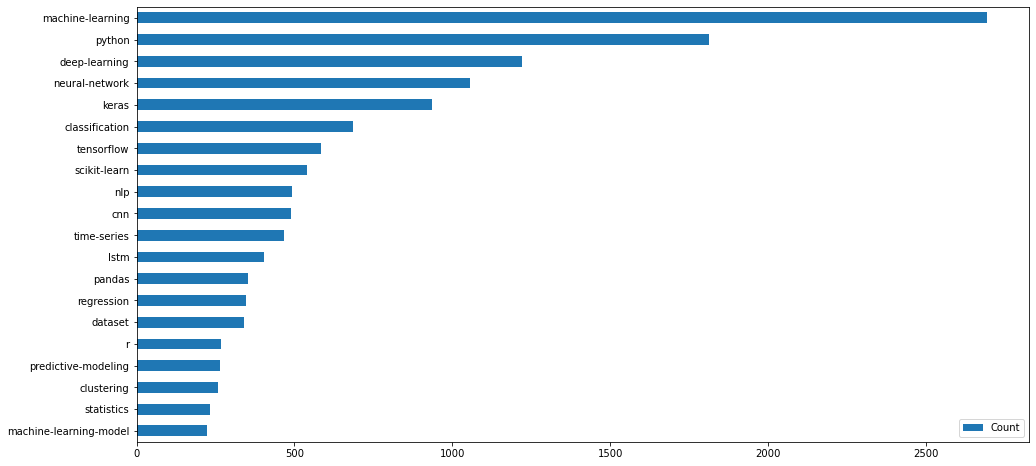

In [13]:
top_tag.plot(kind="barh",figsize=(16,8))